In [1]:
import os
import random
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras

In [2]:
dr = '/home/sahankj/Practice/Major_Project/Retinopothy_set/dr/'
he = '/home/sahankj/Practice/Major_Project/Retinopothy_set/he/'
train_x, train_y = [], []
for each in os.listdir(dr):
    image = np.array(Image.open(dr+each))
    train_x.append(image)
    train_y.append(1.0)
for each in os.listdir(he):
    image = np.array(Image.open(he+each))
    train_x.append(image)
    train_y.append(0)
for i in range(int(len(train_x)/2)):
    a, b = random.randint(0,len(train_x)-1), random.randint(0,len(train_x)-1)
    train_x[a], train_y[a], train_x[b], train_y[b] = train_x[b], train_y[b], train_x[a], train_y[a]
train_x = np.array(train_x)
train_y = np.array(train_y)
train_x = train_x/255.0
train_x

array([[[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        ...,

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]

In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x200 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(512, 512, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # # The fifth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('dandelions') and 1 for the other ('grass')
    tf.keras.layers.Dense(1, activation='sigmoid')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 510, 510, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 255, 255, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 253, 253, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)      

In [6]:
checkpoint_path = "/home/sahankj/Practice/Major_Project/ckpt1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [7]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.RMSprop(lr=0.001),metrics='accuracy')

history = model.fit(train_x,train_y,steps_per_epoch=10,epochs=25,verbose=1,callbacks=[cp_callback])

/home/sahankj/.local/lib/python3.9/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
2022-05-25 08:56:44.167752: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 94371840 exceeds 10% of free system memory.
2022-05-25 08:56:44.258895: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 94371840 exceeds 10% of free system memory.


Epoch 1/25


2022-05-25 08:56:45.947413: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8302


 9/10 [==========================>...] - ETA: 0s - loss: 1.2128 - accuracy: 0.2593
Epoch 1: saving model to /home/sahankj/Practice/Major_Project/ckpt1/cp.ckpt
10/10 [==============================] - 5s 54ms/step - loss: 1.1607 - accuracy: 0.3000
Epoch 2/25
 9/10 [==========================>...] - ETA: 0s - loss: 0.6969 - accuracy: 0.4074
Epoch 2: saving model to /home/sahankj/Practice/Major_Project/ckpt1/cp.ckpt
10/10 [==============================] - 1s 70ms/step - loss: 0.6966 - accuracy: 0.4000
Epoch 3/25
 9/10 [==========================>...] - ETA: 0s - loss: 0.6935 - accuracy: 0.4444
Epoch 3: saving model to /home/sahankj/Practice/Major_Project/ckpt1/cp.ckpt
10/10 [==============================] - 1s 61ms/step - loss: 0.6934 - accuracy: 0.4667
Epoch 4/25
 9/10 [==========================>...] - ETA: 0s - loss: 0.6982 - accuracy: 0.3333
Epoch 4: saving model to /home/sahankj/Practice/Major_Project/ckpt1/cp.ckpt
10/10 [==============================] - 1s 62ms/step - loss: 0.697

In [8]:
for count in range(len(train_x)):
    prediction = model.predict([train_x[count].reshape(-1,512,512,3)])[0]
    print('Actual : ', train_y[count], 'Predicted : ', prediction[0],end = ' ')
    if (train_y[count]>0.5 and prediction[0]>0.5) or (train_y[count]<0.5 and prediction[0]<0.5):
        print("True")
    else:
        print("False")

Actual :  1.0 Predicted :  1.0 True
Actual :  0.0 Predicted :  8.75025e-08 True
Actual :  1.0 Predicted :  0.9962237 True
Actual :  1.0 Predicted :  0.5820676 True
Actual :  1.0 Predicted :  0.79383767 True
Actual :  0.0 Predicted :  2.0677075e-07 True
Actual :  1.0 Predicted :  0.92742 True
Actual :  1.0 Predicted :  0.82175165 True
Actual :  1.0 Predicted :  0.7632997 True
Actual :  0.0 Predicted :  3.8644225e-07 True
Actual :  1.0 Predicted :  0.9998847 True
Actual :  0.0 Predicted :  1.4271315e-05 True
Actual :  1.0 Predicted :  0.99992466 True
Actual :  1.0 Predicted :  0.936885 True
Actual :  1.0 Predicted :  0.9930307 True
Actual :  1.0 Predicted :  0.7320739 True
Actual :  0.0 Predicted :  0.6587559 False
Actual :  1.0 Predicted :  0.84032136 True
Actual :  1.0 Predicted :  1.0 True
Actual :  0.0 Predicted :  1.1209382e-08 True
Actual :  0.0 Predicted :  3.754683e-11 True
Actual :  0.0 Predicted :  0.009958368 True
Actual :  1.0 Predicted :  0.9999974 True
Actual :  0.0 Predict

In [ ]:
path = '/home/sahankj/Practice/Major_Project/My_Dataset_Generalised/Test/Image/'
for each in os.listdir(path):
    image = np.array(Image.open(path+each))
    image = image/255.0
    prediction = model.predict(image.reshape(-1,512,512,3))[0]
    if prediction[0] > 0.5:
        print(each,':',prediction[0],"--> DR")
    else:
        print(each,':',prediction[0],"--> Healthy")

In [11]:

model.load_weights('/home/sahankj/Practice/Major_Project/ckpt1/cp.ckpt')

Text(0.5, 1.0, 'Accuracy Graph')

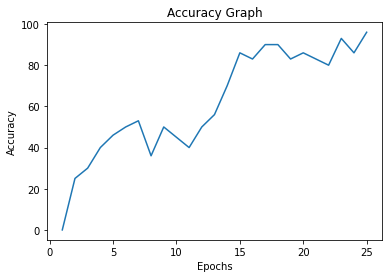

In [1]:
import matplotlib.pyplot as plt

x = [i for i in range(1,26)]
y = [0,25,30,40,46,50,53,36,50,45,40,50,56,70,86,83,90,90,83,86,83,80,93,86,96]

plt.plot(x,y)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')